# KNN Algorithm for IRIS DATA

**KNN using train and test sets ,and finding different parameters and 
analysis of output.** 

In [8]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


High Accuracy

**Testing on training data**

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


It always  be 100%  accuracy, because we are testing on the exact same data, 
it would always make correct predictions.

**Train/test split**

In [11]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(150, 4)
(150,)


In [12]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [13]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [14]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [15]:
# STEP 2: train the model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


**KNN = 5**

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


**KNN = 1**

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [19]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


Text(0, 0.5, 'Testing Accuracy')

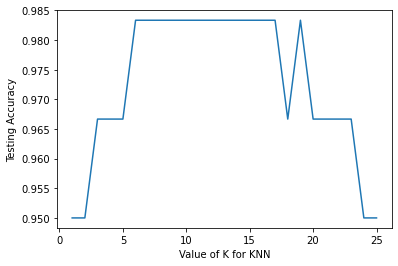

In [20]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Naive Bayes

In [1]:
from sklearn import datasets
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset = datasets.load_iris()

In [3]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

GaussianNB()

In [4]:
print(model)

GaussianNB()


In [5]:
expected = dataset.target
predicted = model.predict(dataset.data)

In [6]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Support Vector Machine(SVM)

In [21]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[25  0  0]
 [ 0 16  1]
 [ 0  0 18]]
Accuracy: 97.78 %
Standard Deviation: 4.44 %


We have a 97.78% of accuracy wich is a very good model, and with the confusion matrix we can see that we have just only one misclassified data.

The iris classification problem is a good project for predict the class and evaluate the columns to check his importance on the predictions

# Association Rule Mining (Unsupervised Learning)

pip install mlxtend

In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
df = pd.read_excel('E:\Datasets\OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
#Data Cleaning

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset = ['InvoiceNo'],inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
#Consulate the items 

basket = (df[df['Country'] == 'France']
          .groupby(['InvoiceNo','Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE',inplace=True , axis = 1)
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames = True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [38]:
rules[ (rules['lift'] >= 6) & 
     (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959


# Machine Learning Interview Questions

1) How will you explain Machine Learning to a School going kid? <br> 
   How is this learning different from supervised learning. <br> 
   <br> 
2) What are various types of MacHine Learning? <br> 
   *Supervised Learning (Learning with teacher) <br> 
   *Unsupervised Learning (Learning without teacher) <br> 
   *ReinforcemEnt Learning (Model learns wiTh hit and trail method)<br> 
   <br> 
3) What's your favorite alogorithm, and can you explain it to me in less than a    minute? <br> 
<br> 
4) How deep learning differs from machine learning? <br> 
<br> 
5) Explain Classification and Regression.  <br> 
   *Part of Supervised learning <br> 
   <br> 
6) What do you understand by selection bias? <br>
<br> 
7) What do you understand by Precision and Recall?<br> 
<br> 
8) Explain false negative, false positive, true negative and true positive with 
   a simple example. <br> 
   <br> 
9) What is confusion/error matrix?<br> 
   *used for classification algorithm<br> 
   <br> 
10) What is the difference between inductive and deductive learning?<br> 
<br> 
11) How is KNN different from k-means clustering?<br> 
    *KNN (Supervised, classification)<br> 
    *K-mean clustering (Unsupervised, clustering)<br> 
    <br> 
12) Can you explain me What is ROC curve and what does it represent?<br> 
    *ROC (Receiving Operating Curve, Falso positive rate(X) v/s True positive        rate(Y))<br> 
    *tradeoff between sensititvity and specificity (inversely proportional)<br> 
    <br> 
13) What is the difference between Typr I error and Type II error? <br> 
     *Type I error(False positive)<br> 
     *Type II error(False negative)<br> 
     <br> 
14) Is it better to have too many false positives or too many false negatives?     Explain.<br> 
    *Spam filtering<br> 
    <br> 
    
15) Which is more important to you - model accuracy, or model performance?<br> 
    *model accuracy is subset of model performance<br> 
    <br> 
16) What is the difference between Gini Impurity and Entropy in a Decision         Tree? <br> 
<br> 
17) What is the difference between Entropy and Information Gain? <br> 
    *Entropy increased then information gain get decreased<br> 
    <br> 
18) What is overfitting? And how do you ensure you are not overfitting with a       model? <br> 
<br> 
19) Explain ensemble learning technique in Machine Learning. <br> 
<br> 
20) What is Bgging and Boosting in machine learning?<br> 
    *Begging and Boosting are both methods of ensemble learning <br> 
    <br> 
21) How would you screen for outliers and what should you do if you find one? <br> 
<br> 
22) What is collinearity and multicollinearity? <br> 
<br> 
23) What do you undesThad by Eigen Vectors and Eigen Values? 
<br> <br> 
24) What is A/B testing? 
<br> <br> 
25) What is cluster sampling? 
<br> <br> 
26) Running a binary classification tree algorithm is quite easy. But do you know how does the tree decide on which variable to split at the root node and it's succeeding child nodes?
<br> <br> 

# Machine Learning Python Questions

1) Name a few libraries in python used for Data Analysis and Scientic Computations. 
<br> 
<br> 
2) Which library would you prefer for plotting in Python Language : Seaborn or Matplotlib or Bokeh ? 
<br> 
<br> 

3) How are NumPy and SciPy related? <br> 
   *Numpy is part of Scipy <br> 
<br> 
4)  What is the difference between a Pandas series and a single - column DataFrame in Python?<br>  
<br> 
5) How an you handle duplicate values in a dataset for a variable in python? 
<br><br>  
6) Write a basic machine learning program to check the accuracy of the dataset importing any dataset using any classifier? 
<br>  
   *import data -> Splitting the dataset -> Selecting Classifier -> Check        Accuracy <br>  
   *How can you improve your accuracy? 
   <br>  <br>  

# Scenario Based Questions

1) You are given a dataset consisting of variables having more than 30% missing values?
Let's say, Out of 50 variables, 8 variables have missing values higher than 30%. How will you deal with them? 

2) Write an SQL query that makes recommendations using the pages that your friends, liked. Assume you have two tables: a two-column table of users and their friends, and a two-column table of users and the pages they liked. It should not recommend pages you already like. 

3) There is game where you are asked to roll two fair six-sided dice. If the sum of the values on the dice equals seven, then you win 21 dollars. Howwever, you must pay 5 dollars to play each time you roll both dice. Do you play this game? And in follow up: If he plays 6 times what is the probability of making money from this game? 

4) We have two options for serving ads wishing Newsfeed : <br>  
1 - out of every 25 sstories , one will be an ad<br>  
2 - every story has 4% chance of being an ad

For each option, what is the expected number of ads shown in 100 new stories? If we go with option 2, what is the chance a user will be shown only a single ad in 100 stories? What about no ads at all? 

* Binomial Distribution

5) How would you predict who will renew their subscription next month? What data would you need to solve this? What analysis would you do? Would you build predictive models? If so, which algorithms? 

* Classification Problem

6) How do you map nicnames (Pete, Andy, Nick, Rob etc.) to real name? 

7) A jar has 1000 coins of which 999 are fair and 1 is double headed. Pick a coin at random, and toss it 10 times. Given that you see 10 heads, what is the probability that the next toss of that coin is also a head. 

8) Suppose you are given a dataset which has missing values spread out along 1 standard deviation from the median. What percentage of data would remain affected and why? 

* Normal Distribution

9) You are given a cancer detection dataset. Let's suppose when you build a classification model you achieved an accuracy of 96%. Why should't you be happy with your model performance? What can you do about it? 

10) You are working on a time series data set. Your manager has asked you to build a high accuracy model. You start with the decision tree algorithm, since you know it works fairly well on kinds of data. Later, you tried a time series regression model and got higher accuracy than decision tree model. Can this happen? Why?

11) Suppose you find that your model is suffering from low bias and high variance. Which algorithm you think could tackle this situation and Why?

* bagging algorithm

12) You are given a dataset. The dataset contains many variables, some of which are highly correlated and you know about it. Your manager has asked you to run PCA. Would you remove correlated variables first? Why?